    Load the loan csv file to dataframe

In [1]:
#Load the necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


loan=pd.read_csv("loan.csv",low_memory=False)


    Study the dataframe for cleaning ;

In [2]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


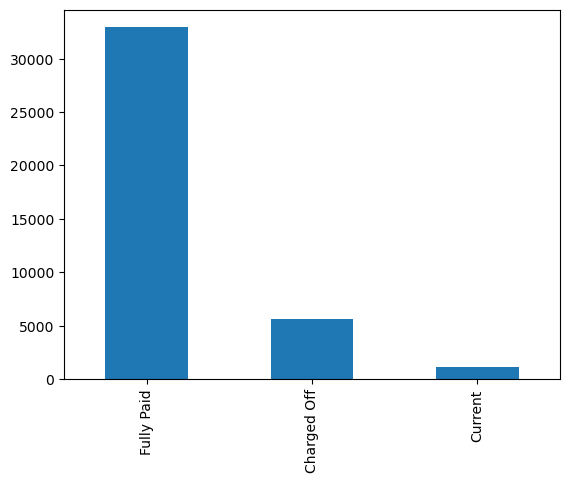

In [3]:
# grouping the values by status 
loan.loan_status.value_counts()
# Fully paid - 32950 , Charged off - 5627 ,Current -1140 , to better visualise the count using bar chart 
loan['loan_status'].value_counts().plot(kind='bar')
plt.show()

Cleaning action 1 - Current status may not help in analysing the data much in the context that we may not apply the inference on these customers now , hence deleting the rows where loan_status ='current'

In [4]:
loan= loan[loan['loan_status']!='Current']

In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.0+ MB


No of rows reduced to 38577 after removing 1140 rows where loan_status =current 
Cleaning task 2 = Removing columns with all null values , this might make it easy to analyse the dataframe !!

In [6]:
loan= loan.dropna(axis=1,how="all")

In [7]:
len(loan.columns)

56

# No of columns have reduced from 111 to 56

In [8]:
# Removing the 'fullypaid rows as it doesnt seem to be helping in analysis '

loan['loan_status'].value_counts()

# Removing 32950 rows which are fully paid 

loan1= loan[loan['loan_status']!='Fully Paid']


In [9]:
loan1['loan_status'].value_counts()

Charged Off    5627
Name: loan_status, dtype: int64

WE have 5627 rows for analysing ; checking the data sanity of below columns chosen for analyses 
sub_grade
grade
num_op_rev_tl Vs delinq_amnt
out_prncp Vs tot_cur_bal
percent_bc_gt_75

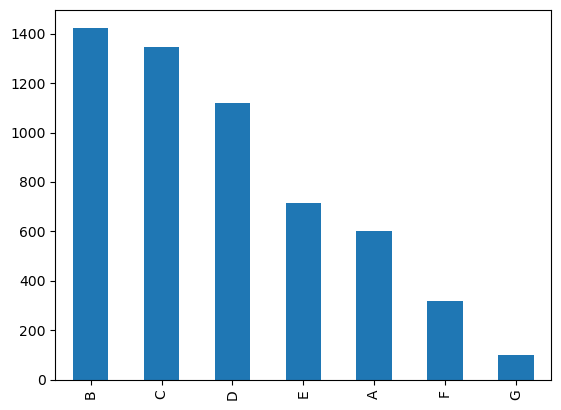

In [10]:
# Plotting hist of grade and sub grade 


loan1["grade"].value_counts().plot(kind="bar")
plt.show()

Inference : There seems an in increasing num of defaulters where the loan grade is B.

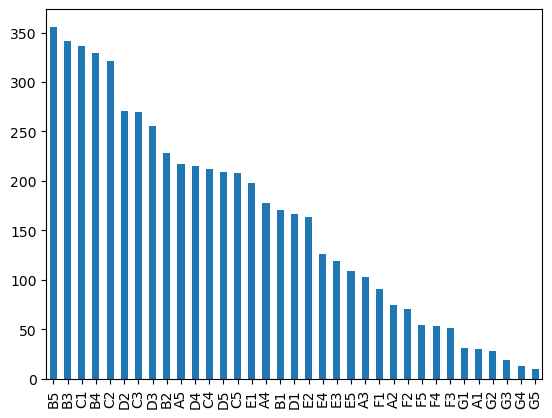

In [11]:
loan1["sub_grade"].value_counts().plot(kind="bar")
plt.show()

Inference : Grade B5, B3, C1, B4,C2 seems to be having highest number of defaulters 

The below were identified as potential columns for analysis to check bank limit and outstanding amount had any co-relation , but 
both had null values and couldnt use.

percent_bc_gt_75 -Percentage of all bankcard accounts > 75% of limit - had null values - hence couldnt infer much 
out_prncp_inv- Remaining outstanding principal for portion of total amount funded by investors
tot_cur_bal = Total current balance of all accounts

No inference made


In [12]:
loan1["int_rate"].value_counts()



13.49%    127
11.49%    127
10.99%     95
11.71%     91
11.99%     76
         ... 
7.42%       1
20.69%      1
18.53%      1
14.18%      1
18.72%      1
Name: int_rate, Length: 332, dtype: int64

loan["int_rate"].value_counts()
Seems like have a % symbol which needs to be removed for further analysis 

Analysing the effect of interest rate on defaulting on grade B?

In [58]:
# Remove % from percentage - int_rate

import warnings

warnings.filterwarnings('ignore')

def clean_percen(val):
    val=str(val).replace("%","")
    return float(val)

loan1.int_rate = loan1.int_rate.apply(clean_percen)

loan1.int_rate = loan1.int_rate.apply(lambda x : float(x))

loan1.info()
                                            


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5627 entries, 1 to 39688
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   id                          5627 non-null   int64   
 1   member_id                   5627 non-null   int64   
 2   loan_amnt                   5627 non-null   int64   
 3   funded_amnt                 5627 non-null   int64   
 4   funded_amnt_inv             5627 non-null   float64 
 5   term                        5627 non-null   object  
 6   int_rate                    5627 non-null   float64 
 7   installment                 5627 non-null   float64 
 8   grade                       5627 non-null   object  
 9   sub_grade                   5627 non-null   object  
 10  emp_title                   5143 non-null   object  
 11  emp_length                  5399 non-null   object  
 12  home_ownership              5627 non-null   object  
 13  annual_inc       

<AxesSubplot:>

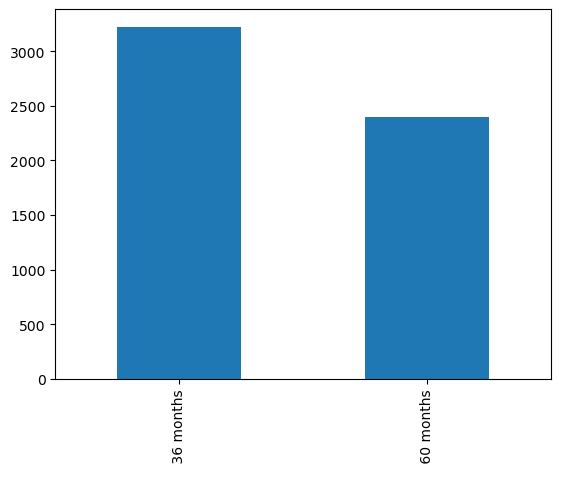

In [14]:
loan1["term"].value_counts().plot(kind="bar")

Inference : Shorter the term more defaulters 

<AxesSubplot:xlabel='int_rate', ylabel='Count'>

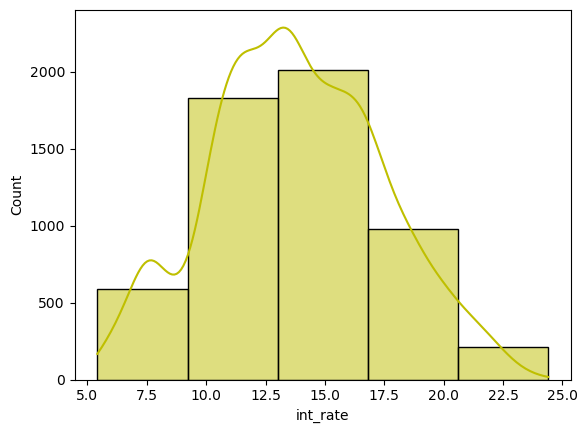

In [15]:
sns.histplot(loan1['int_rate'],kde=True, color ="y" , bins=5)

Inference : Most of the defaulters are in the interest rate 15 ..

In [16]:
loan1["loan_amnt"].describe()

count     5627.000000
mean     12104.385108
std       8085.732038
min        900.000000
25%       5600.000000
50%      10000.000000
75%      16500.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

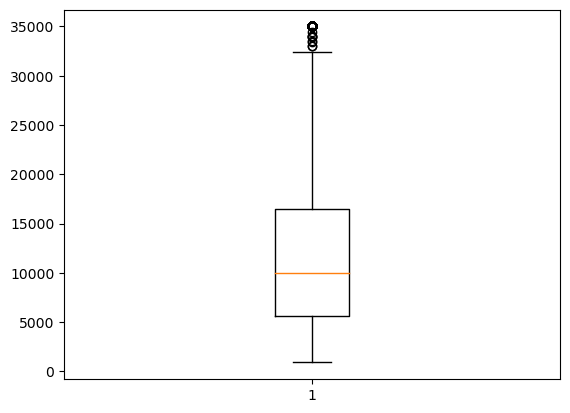

In [17]:
plt.boxplot(loan1["loan_amnt"])

plt.show

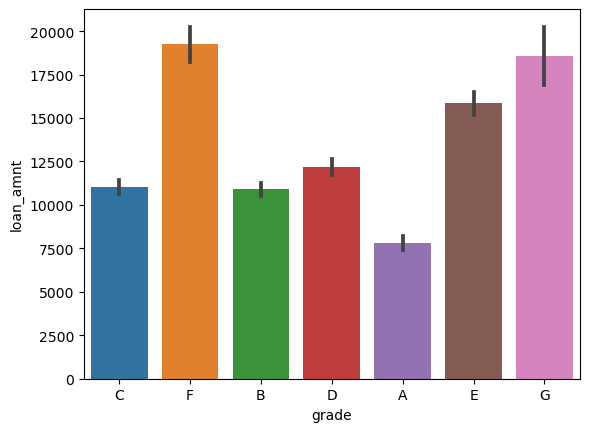

In [18]:
sns.barplot(data=loan1, x="grade", y="loan_amnt")
plt.show()

Inference: loan_amt for grade F and Grade G seems to have some co-relation , which can studied further 

In [19]:
loan1["annual_inc"].describe()

# Decided not to remove the outliers for income for now

count    5.627000e+03
mean     6.242730e+04
std      4.777601e+04
min      4.080000e+03
25%      3.700000e+04
50%      5.300000e+04
75%      7.500000e+04
max      1.250000e+06
Name: annual_inc, dtype: float64

<AxesSubplot:>

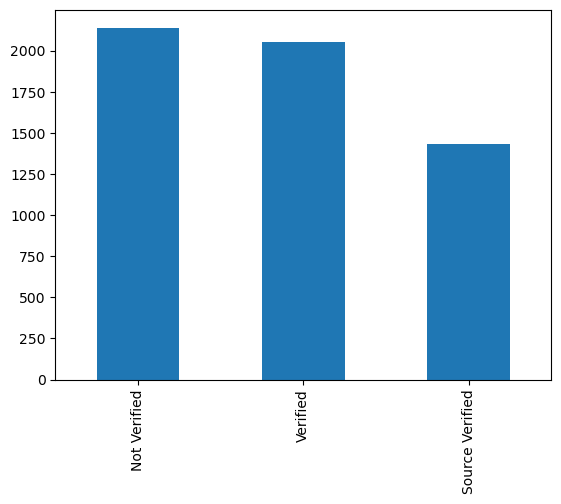

In [20]:
# Income verification status and defaulter spread 

loan1["verification_status"].value_counts().plot(kind="bar")


Inference :Most of the defaulters have in the status Not verified , which can be studied further 

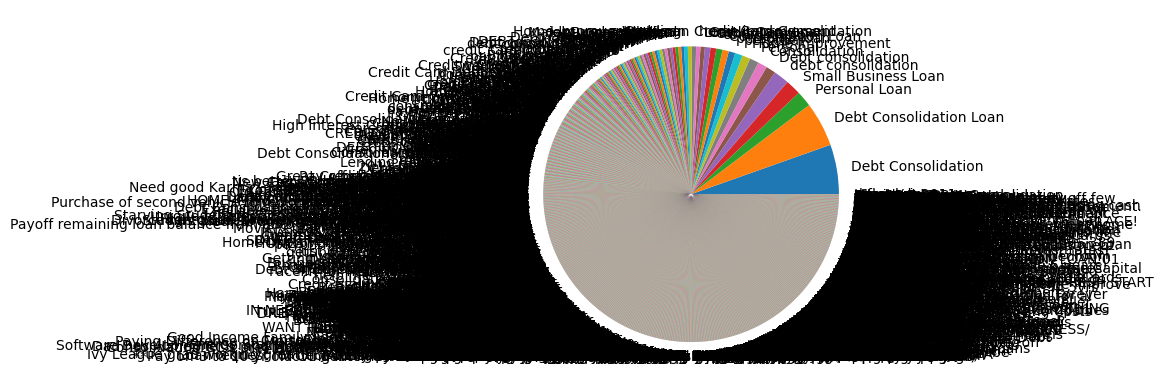

In [60]:
# Studying title vs defaulter count 

import warnings

warnings.filterwarnings('ignore') 


loan1['title'].value_counts().plot.pie()
plt.show()


Inference : Top 3 titles are small Business loan , Debt consolidateion , Debt Consolidation loan , 
these categories might need further investigation.

<AxesSubplot:>

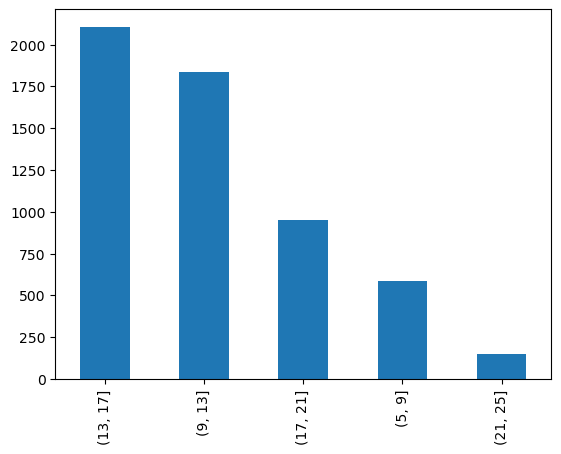

In [50]:
# binning of interest rates

import warnings
warnings.filterwarnings('ignore')

bin2 = [5,9,13,17,21,25]

#loan1["int_rate"]= loan1["int_rate"].apply(lambda x : float(x))

loan1["interest_bin"]= pd.cut(loan1["int_rate"],bin2)

loan1["interest_bin"].value_counts().plot(kind="bar")

Inference : Most of the defaulters are in the highest interest rate category 

[50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000]


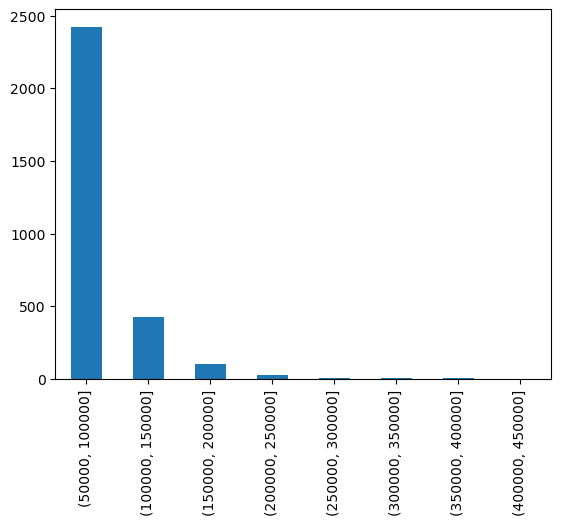

In [23]:
# binning annual income 

#creating bins of 50,000 for annual inc

import warnings
warnings.filterwarnings('ignore')

bins2=[]
n=0
for i in range (50000,500000,50000):
    bins2.append(i)
print(bins2)

loan1.income_bin= pd.cut(loan1.annual_inc,bins2)
loan1.income_bin.value_counts()

loan1.income_bin.value_counts().plot(kind="bar")
plt.show()

Inference : Most of the defaulters are in the lowest income range , which needs further study 

<function matplotlib.pyplot.show(close=None, block=None)>

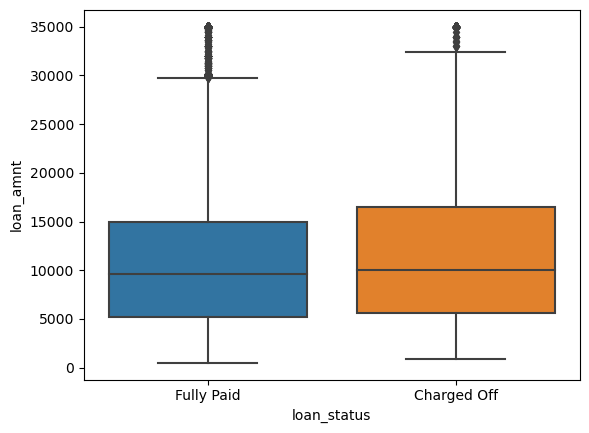

In [24]:
#Analysing loan amount vs the loan_status - to check for any co-relation 

#loan.loan_amnt.value_counts()
#loan.loan_status.info()

#loan.flag = loan.loan_status.apply(lambda x : D if x="Charged Off")

sns.boxplot(x = loan.loan_status , y =  loan.loan_amnt ,data=loan)

plt.show

Inference : 75% of loan amount taken by Charged Off status is higher than the 75% of loan amount taken by fully paid , 
is there any rules to be applied on loan amount.It seems like people with higher amount has defaulted

<AxesSubplot:xlabel='loan_status'>

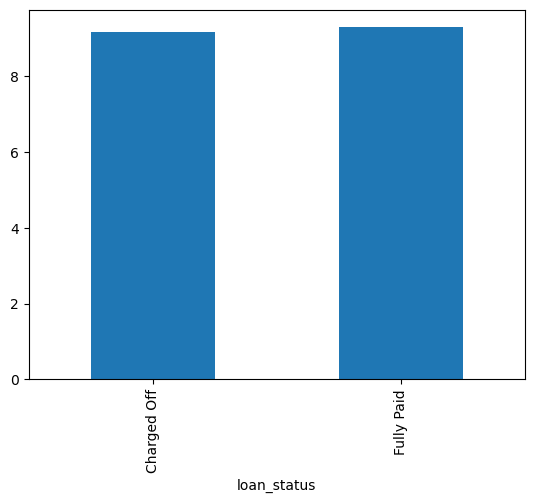

In [35]:
# checking the defaulters against no of credit line.

loan.open_acc.describe()

##Plot a bar plot of loan status vs average number of credit lines 
loan.groupby('loan_status')['open_acc'].mean().plot.bar()


Inference :  The number of credit lines doesnt seem to be having any co-relation with defaulters ; fully paid members 
seems to have an average 9. something which almost same as those of Charged Off members 

<AxesSubplot:>

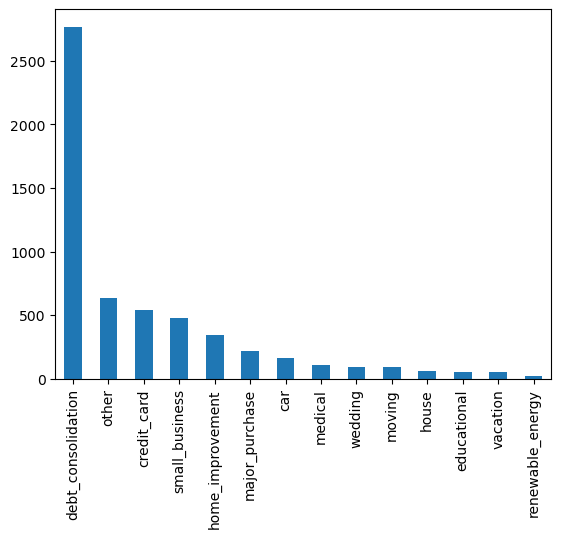

In [46]:
# Purpose of loan vs most defaluters 

loan.purpose[loan.loan_status=="Charged Off"].value_counts().plot(kind='bar')

Inference - Most of defaulters seems to be falling under purpose debt consolidation , may this category needs bit more scrutiny 

<AxesSubplot:xlabel='purpose'>

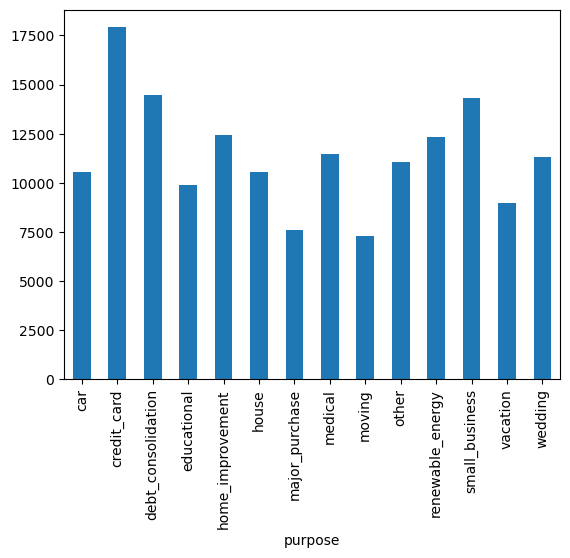

In [49]:
#checking wehther purpose has anything to be income bins 

loan1.groupby('purpose')['revol_bal'].mean().plot.bar()

In [52]:
import warnings
warnings.filterwarnings('ignore')

# Remove % from percentage - revol_util

def clean_percen(val):
    val=str(val).replace("%","")
    return float(val)

loan1.revol_util = loan1.revol_util.apply(clean_percen)

loan1.revol_util = loan1.revol_util.apply(lambda x : float(x))


<AxesSubplot:>

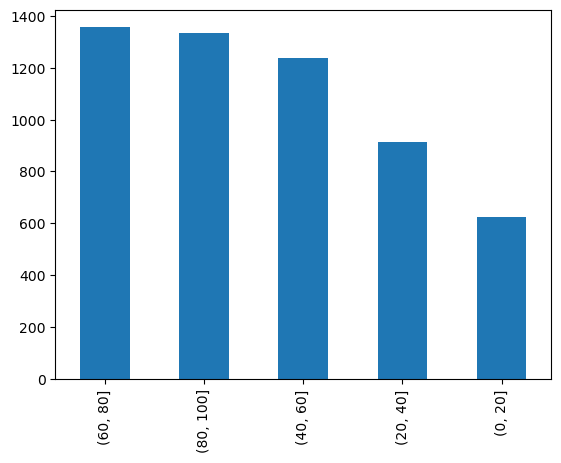

In [56]:
loan1.revol_util.value_counts()

bin2 = [0,20,40,60,80,100]

#loan1["int_rate"]= loan1["int_rate"].apply(lambda x : float(x))

loan1["revol_util_bin"]= pd.cut(loan1["revol_util"],bin2)

loan1["revol_util_bin"].value_counts().plot(kind="bar")

Inference : Most of defaulters are in the revol_util (Revolving line utilization rate, or
the amount of credit the borrower is using relative to all available revolving credit.) of 60-80%

<AxesSubplot:xlabel='purpose'>

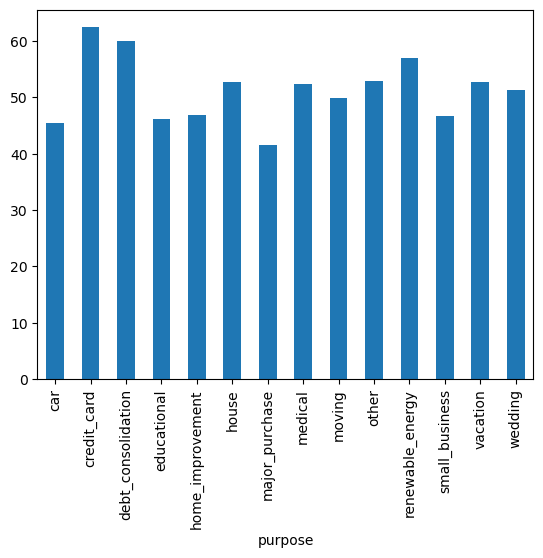

In [57]:
loan1.groupby('purpose')['revol_util'].mean().plot.bar()

Inference : Those borrowing money for credit card payment (?) and debt consolidation seems to be having 60% revol util 
    - which seems to be where defaulter count is concentrated 

<AxesSubplot:xlabel='home_ownership'>

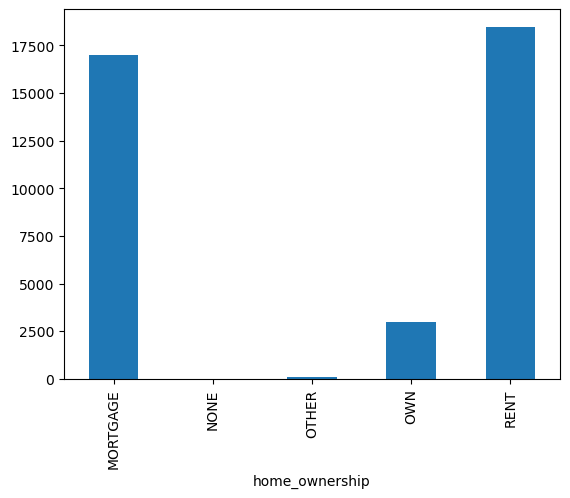

In [99]:
#loan status vs home ownership for Charged Off + Fully Paid

loan.groupby('home_ownership')['loan_status'].count().plot.bar()


<AxesSubplot:xlabel='home_ownership'>

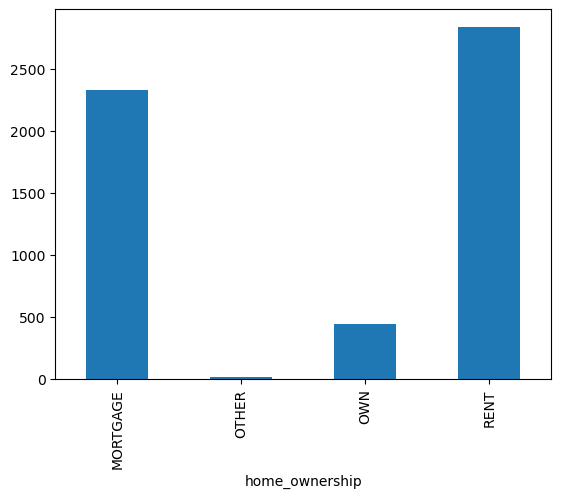

In [98]:
#loan status vs home ownership for Charged Off 

loan1.groupby('home_ownership')['loan_status'].count().plot.bar()
